In [1]:
import torch

In [2]:
import torch.nn as nn

In [3]:
import torch.nn.functional as F

In [5]:
import matplotlib.pyplot as plt

In [6]:
import sklearn.datasets as dt

In [7]:
x, y = dt.make_moons(200, noise = 0.20)

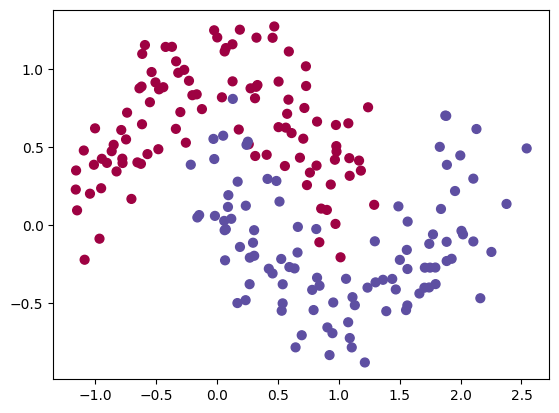

In [8]:
plt.scatter(x[:,0], x[:,1], s=40, c=y, cmap=plt.cm.Spectral)
plt.show()

In [9]:
# converting the dataset into torch tensors

In [23]:
x = torch.FloatTensor(x)

In [24]:
y = torch.LongTensor(y)

In [12]:
y

tensor([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
        1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
        1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
        0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
        0, 1, 1, 1, 0, 0, 0, 1])

In [13]:
x

tensor([[ 2.1305,  0.6149],
        [ 0.8409, -0.1116],
        [ 0.7320,  0.8909],
        [ 1.7031, -0.4031],
        [ 0.2372,  0.1229],
        [-0.3002,  0.7236],
        [-0.7459,  0.5483],
        [ 0.3127,  0.8124],
        [ 0.8220,  0.6624],
        [-0.2015,  0.8318],
        [ 0.5137,  0.1496],
        [ 1.6621, -0.4405],
        [ 0.5654,  0.6236],
        [ 0.5903,  1.1122],
        [-0.2147,  0.3858],
        [ 0.9817,  0.4706],
        [ 1.5658,  0.0211],
        [ 1.5640, -0.2833],
        [-0.7748,  0.3966],
        [ 0.9245, -0.8354],
        [ 0.1276,  1.1584],
        [ 2.0075, -0.0385],
        [ 1.2963, -0.1054],
        [ 0.5764,  0.7125],
        [ 0.8221, -0.3392],
        [ 0.1892, -0.1417],
        [ 1.4899,  0.1186],
        [ 0.7089,  0.5528],
        [-0.3692,  1.1422],
        [-0.5702,  0.4540],
        [-0.0218,  0.4223],
        [-0.6186,  0.8873],
        [-0.4212,  1.1416],
        [ 0.2613,  0.5173],
        [ 0.5395, -0.5036],
        [-0.3369,  0

In [22]:
class FeedForward(nn.Module):
    def __init__(self, input_neurons, hidden_neurons, output_neurons):
        super(FeedForward, self).__init__()
        self.hidden_layer = nn.Linear(input_neurons, hidden_neurons)
        self.output_layer = nn.Linear(hidden_neurons, output_neurons)
    def forward(self, x):
        x = self.hidden_layer(x)
        x = F.relu(x)
        x = self.output_layer(x)
        return x
        

In [15]:
x

tensor([[ 2.1305,  0.6149],
        [ 0.8409, -0.1116],
        [ 0.7320,  0.8909],
        [ 1.7031, -0.4031],
        [ 0.2372,  0.1229],
        [-0.3002,  0.7236],
        [-0.7459,  0.5483],
        [ 0.3127,  0.8124],
        [ 0.8220,  0.6624],
        [-0.2015,  0.8318],
        [ 0.5137,  0.1496],
        [ 1.6621, -0.4405],
        [ 0.5654,  0.6236],
        [ 0.5903,  1.1122],
        [-0.2147,  0.3858],
        [ 0.9817,  0.4706],
        [ 1.5658,  0.0211],
        [ 1.5640, -0.2833],
        [-0.7748,  0.3966],
        [ 0.9245, -0.8354],
        [ 0.1276,  1.1584],
        [ 2.0075, -0.0385],
        [ 1.2963, -0.1054],
        [ 0.5764,  0.7125],
        [ 0.8221, -0.3392],
        [ 0.1892, -0.1417],
        [ 1.4899,  0.1186],
        [ 0.7089,  0.5528],
        [-0.3692,  1.1422],
        [-0.5702,  0.4540],
        [-0.0218,  0.4223],
        [-0.6186,  0.8873],
        [-0.4212,  1.1416],
        [ 0.2613,  0.5173],
        [ 0.5395, -0.5036],
        [-0.3369,  0

In [25]:
network = FeedForward(input_neurons=2, hidden_neurons=50, output_neurons=2)

In [26]:
optimizer = torch.optim.SGD(network.parameters(), lr=0.02)

In [27]:
loss_function = nn.CrossEntropyLoss()

In [20]:
y

tensor([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
        1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
        1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
        1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
        0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
        0, 1, 1, 1, 0, 0, 0, 1])

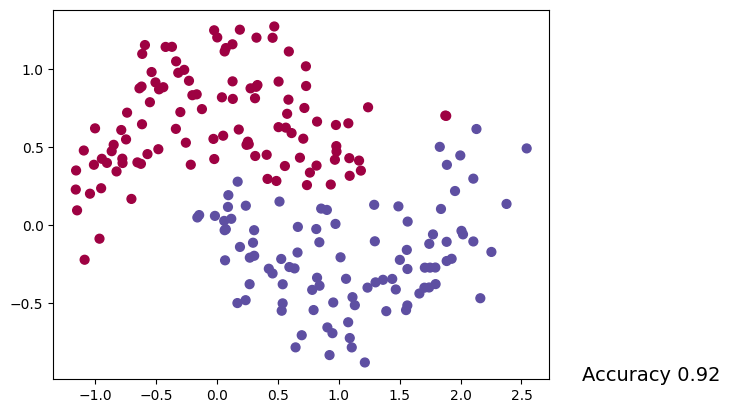

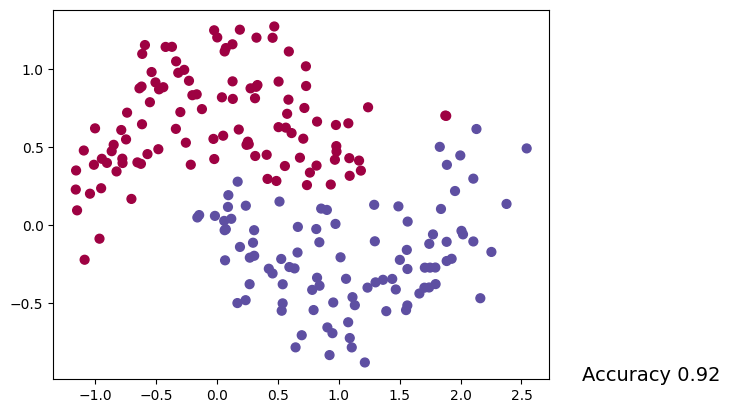

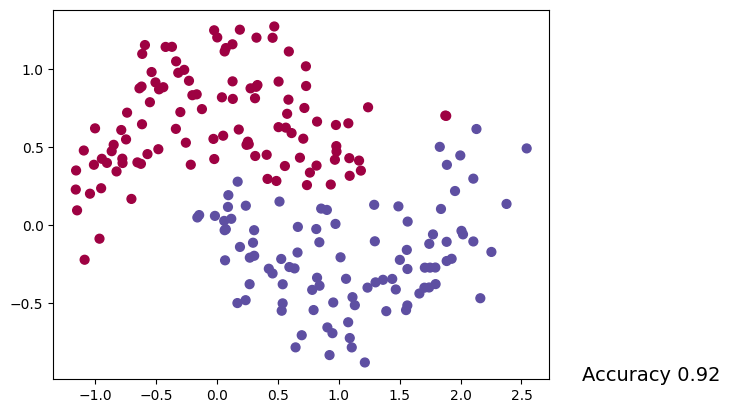

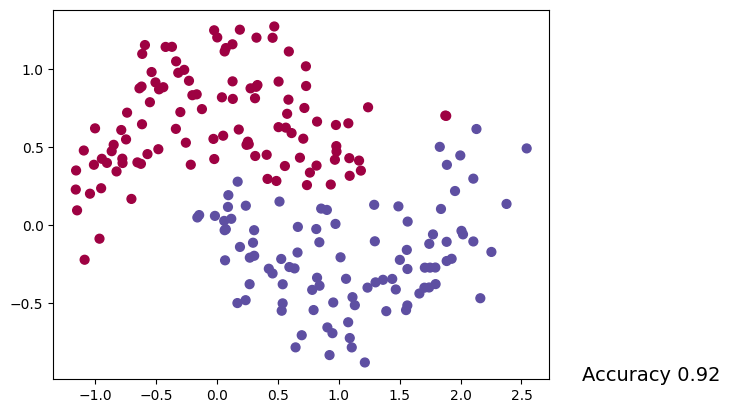

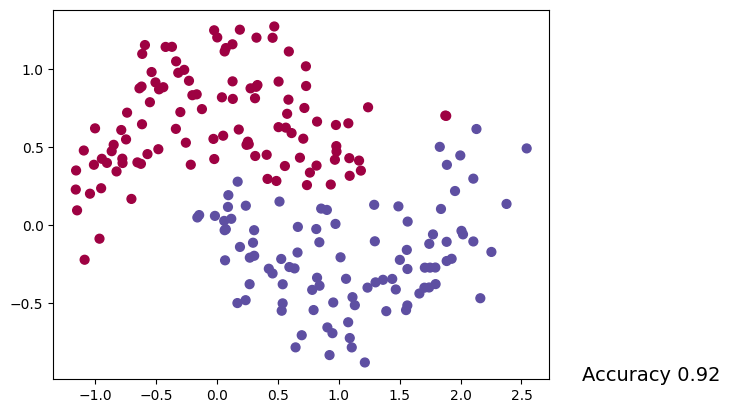

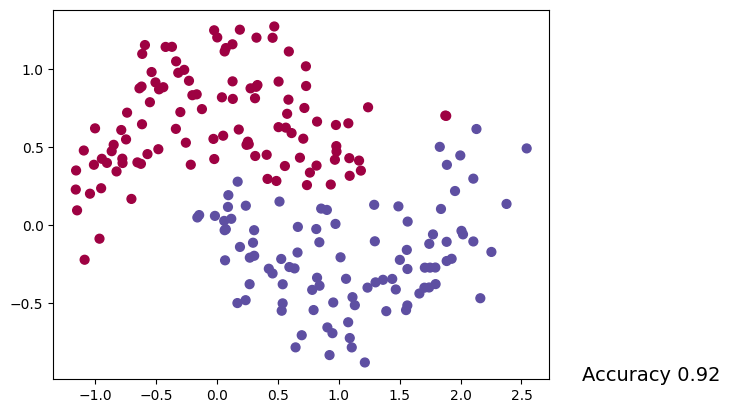

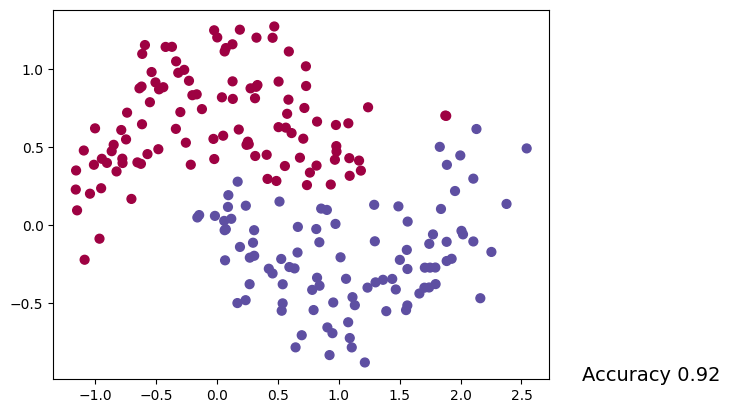

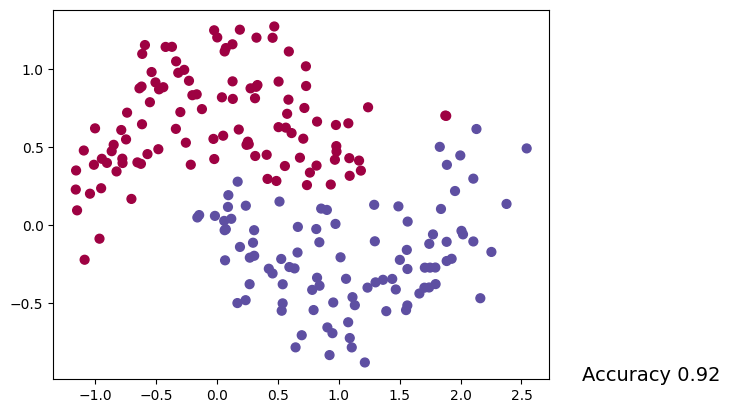

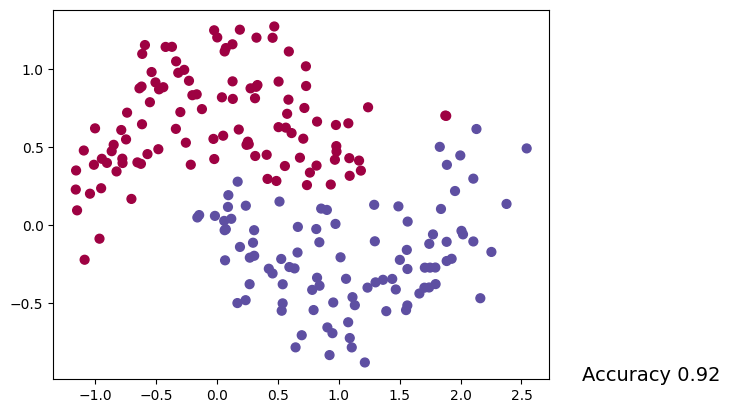

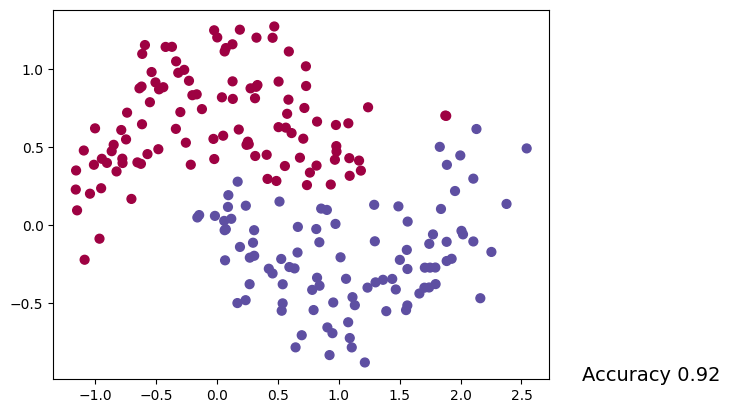

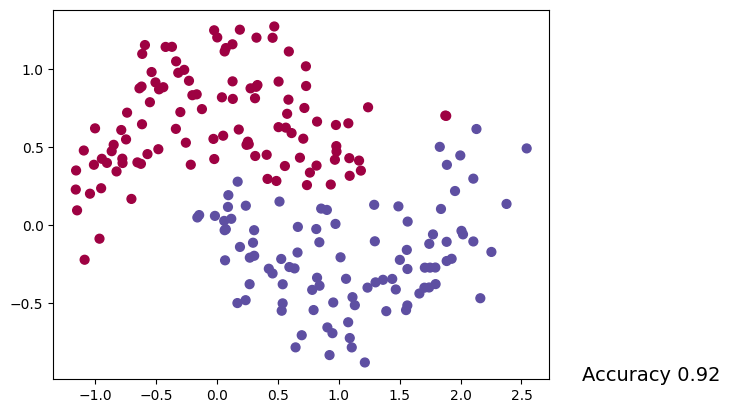

In [30]:
plt.ion()
for epoch in range(1001):
    out = network(x)
    loss = loss_function(out, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        max_value, prediction = torch.max(out, 1)
        predicted_y = prediction.data.numpy()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:,0], x.data.numpy()[:,1], s=40, c=predicted_y, cmap=plt.cm.Spectral)
        accuracy = (predicted_y == target_y).sum() / target_y.size
        plt.text(3, -1, "Accuracy {:.2f}".format(accuracy), fontdict={'size': 14})
        plt.pause(0.1)
plt.ioff()
plt.show()